**IMPORTING PACKAGES**

In [2]:
#Import Library
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

**LOAD DATASET**

In [3]:
#Import Data
data = pd.read_csv('data_diabetes.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


**DATA PREPOCESSING**

In [4]:
data.info() #Data Description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Insight:
* Data terdiri dari 520 sampel tanpa kolom nol.
* Age merupakan type data integer. Sedangkan Gender,	Polyuria,	Polydipsia,	sudden weight loss, weakness,	Polyphagia,	Genital thrush,	visual blurring,	Itching,	Irritability	delayed healing,	partial paresis, muscle stiffness,	Alopecia,	Obesity merupakan type data object.

**1. Deteksi Missing Value**

In [5]:
#Deteksi Missing Value
#Percentage of Missing Values in Each Column
data.isna().sum() * 100 / len(data)

Age                   0.0
Gender                0.0
Polyuria              0.0
Polydipsia            0.0
sudden weight loss    0.0
weakness              0.0
Polyphagia            0.0
Genital thrush        0.0
visual blurring       0.0
Itching               0.0
Irritability          0.0
delayed healing       0.0
partial paresis       0.0
muscle stiffness      0.0
Alopecia              0.0
Obesity               0.0
class                 0.0
dtype: float64

Insight :

Berdasarkan hasil perhitungan persentase jumlah missing value diperoleh nilai 0,0%, sehingga dapat disimpulkan tidak ada missing value pada 17 kolom yang ada.

**2. Data Transformation**

In [6]:
#Normalisasi Data
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['Polyuria'] = labelencoder.fit_transform(data['Polyuria'])
data['Polydipsia'] = labelencoder.fit_transform(data['Polydipsia'])
data['sudden weight loss'] = labelencoder.fit_transform(data['sudden weight loss'])
data['weakness'] = labelencoder.fit_transform(data['weakness'])
data['Polyphagia'] = labelencoder.fit_transform(data['Polyphagia'])
data['Genital thrush'] = labelencoder.fit_transform(data['Genital thrush'])
data['visual blurring'] = labelencoder.fit_transform(data['visual blurring'])
data['Itching'] = labelencoder.fit_transform(data['Itching'])
data['Irritability'] = labelencoder.fit_transform(data['Irritability'])
data['delayed healing'] = labelencoder.fit_transform(data['delayed healing'])
data['partial paresis'] = labelencoder.fit_transform(data['partial paresis'])
data['muscle stiffness'] = labelencoder.fit_transform(data['muscle stiffness'])
data['Alopecia'] = labelencoder.fit_transform(data['Alopecia'])
data['Obesity'] = labelencoder.fit_transform(data['Obesity'])
data['class'] = labelencoder.fit_transform(data['class'])
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**EXPLORATORY DATA ANALYSIS**

**1. Jumlah Penderita Diabetes Melitus**

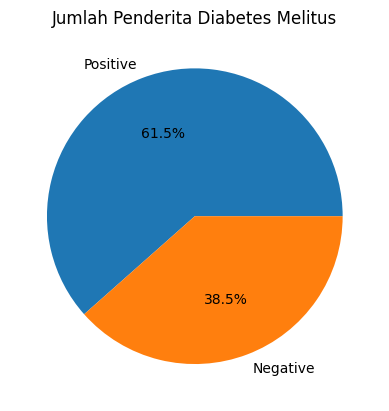

In [7]:
# Count the number of positive and negative values
counts = data['class'].value_counts()

# Create the pie chart
plt.pie(counts, labels=['Positive', 'Negative'], autopct='%1.1f%%')

# Add a title
plt.title('Jumlah Penderita Diabetes Melitus')

# Show the chart
plt.show()

Insight :

Dari 520 data dapat diketahui bahwa sebanyak 320 pasien atau sebesar 61,5% terdeteksi Diabetes Melitus. Sedangkan untuk yang tidak terdeteksi Diabetes Melitus adalah sebanyak 200 pasien atau sebesar 38,5%

**2. Statistika Deskriptif Usia**

In [8]:
#Menghitung statistik deskriptif
print('Statistik Deskriptif Usia')
print(data['Age'].describe())

Statistik Deskriptif Usia
count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64


Insight :

Usia pasien paling muda adalah 16 tahun dan usia paling tua adalah 90 tahun dengan rata-rata pasien 48 tahun.

**3. Deskripsi Kuantitatif Statistik dari Fitur Kategorik**

In [9]:
list_category = ['Gender',	'Polyuria',	'Polydipsia',	'sudden weight loss', 'weakness',	'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	'Irritability',	'delayed healing',	'partial paresis', 'muscle stiffness',	'Alopecia',	'Obesity']

for category in list_category : 
  # frequency count
  freq_gender = data[category].value_counts()
  print(freq_gender)
  
  # crosstabulation
  cross = pd.crosstab(data[category], data["class"])
  print(cross)

1    328
0    192
Name: Gender, dtype: int64
class     0    1
Gender          
0        19  173
1       181  147
0    262
1    258
Name: Polyuria, dtype: int64
class       0    1
Polyuria          
0         185   77
1          15  243
0    287
1    233
Name: Polydipsia, dtype: int64
class         0    1
Polydipsia          
0           192   95
1             8  225
0    303
1    217
Name: sudden weight loss, dtype: int64
class                 0    1
sudden weight loss          
0                   171  132
1                    29  188
1    305
0    215
Name: weakness, dtype: int64
class       0    1
weakness          
0         113  102
1          87  218
0    283
1    237
Name: Polyphagia, dtype: int64
class         0    1
Polyphagia          
0           152  131
1            48  189
0    404
1    116
Name: Genital thrush, dtype: int64
class             0    1
Genital thrush          
0               167  237
1                33   83
0    287
1    233
Name: visual blurring, dtype: i

Insight :

Diketahui jumlah pasien yang positif maupun negatif Diabetes Melitus dari masing-masing variabelnya dengan total kesuluruhan pasien sejumlah 520 orang.

**MACHINE LEARNING (KLASIFIKASI RANDOM FOREST)**

**1. Membagi data training dan data testing dengan holdout validation**

In [10]:
#Memisahkan Variabel Prediktor dan Target
X = data.drop(['class'], axis=1)
y = data ['class']

In [11]:
#Membagi Data Training dan Data Testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((364, 16), (156, 16), (364,), (156,))

**2. Tuning hyperparameter Random Forest**

In [12]:
#Tuning Hyperparameter
param_grid={
"n_estimators" :[100,150,200,250,500],
"max_features" :[4,5,6,7,8],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring="accuracy",cv= 5,verbose=3)
# fitting the model for grid search
y1 = y.values.ravel()
grid.fit(X, y1)
grid.cv_results_
df = pd.DataFrame(grid.cv_results_)
df
print(f'Best Score: {grid.best_score_}')
best_params = grid.best_estimator_.get_params()
print(f'Best Parameters:')
for param in param_grid:
 print(f'\t{param}: {best_params[param]}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..max_features=4, n_estimators=100;, score=0.952 total time=   0.2s
[CV 2/5] END ..max_features=4, n_estimators=100;, score=0.981 total time=   0.2s
[CV 3/5] END ..max_features=4, n_estimators=100;, score=0.933 total time=   0.2s
[CV 4/5] END ..max_features=4, n_estimators=100;, score=1.000 total time=   0.2s
[CV 5/5] END ..max_features=4, n_estimators=100;, score=1.000 total time=   0.2s
[CV 1/5] END ..max_features=4, n_estimators=150;, score=0.962 total time=   0.4s
[CV 2/5] END ..max_features=4, n_estimators=150;, score=0.981 total time=   0.4s
[CV 3/5] END ..max_features=4, n_estimators=150;, score=0.923 total time=   0.3s
[CV 4/5] END ..max_features=4, n_estimators=150;, score=1.000 total time=   0.3s
[CV 5/5] END ..max_features=4, n_estimators=150;, score=1.000 total time=   0.3s
[CV 1/5] END ..max_features=4, n_estimators=200;, score=0.962 total time=   0.4s
[CV 2/5] END ..max_features=4, n_estimators=200

**3. Model pohon klasifikasi Random Forest**

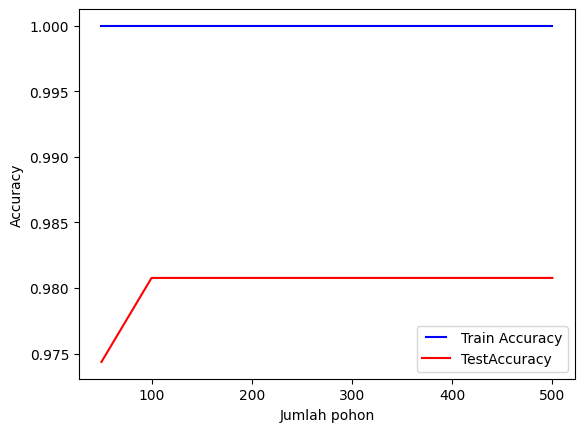

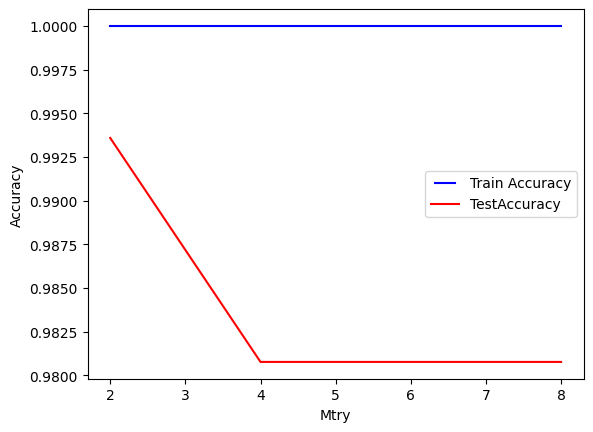

In [13]:
#Grafik Ntree dan Mtry
max_features = [50,100,150,250,500]
train_results = []
test_results = []
for max_feature in max_features:
  rf = RandomForestClassifier(n_estimators=max_feature,random_state=23)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  hasil1=accuracy_score(y_train, train_pred)
  train_results.append(hasil1)
  y_pred = rf.predict(X_test)
  hasil2=accuracy_score(y_test, y_pred)
  test_results.append(hasil2)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_features, test_results, 'r', label="TestAccuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Jumlah pohon')
plt.show()
max_features = [2,3,4,5,6,7,8]
train_results = []
test_results = []
for max_feature in max_features:
  rf = RandomForestClassifier(max_features=max_feature,n_estimators=100,random_state=23)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  hasil1=accuracy_score(y_train, train_pred)
  train_results.append(hasil1)
  y_pred = rf.predict(X_test)
  hasil2=accuracy_score(y_test, y_pred)
  test_results.append(hasil2)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_features, test_results, 'r', label="TestAccuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Mtry')
plt.show()
features=X.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
featuresy2=(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])

Insight : 

*   Grafik Mtry menunjukkan pengaruh perubahan jumlah pemilah terhadap nilai akurasi. Nilai akurasi pada data train tampak stabil sedangkan data test mulai konvergen pada jumlah pemilah 4.
*   Grafik Jumlah Pohon menunjukkan perubahan jumlah pohon terhadap nilai akurasi. Semakin banyak jumlah pohon cenderung menghasilkan nilai akurasi yang lebih baik. Nilai akurasi pada data train tampak stabil tetapi data test mulai konvergen pada jumlah pohon 100.

In [14]:
#Konfigurasi Model Random Forest
rf = RandomForestClassifier(bootstrap=True, class_weight=None,criterion='gini',
                            max_depth=None, max_features=4, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=500,
                            n_jobs=None, oob_score=False, random_state=120,
                            verbose=0, warm_start=False)

**4. Pengukuran Performa Klasifikasi**

In [15]:
#Pemodelan dan Prediksi dengan Proporsi Training:Testing 70%:30%
rf.fit(X_train,y_train)
ypred1=rf.predict(X_train)
print(confusion_matrix(y_train,ypred1))
eval_rf = pd.DataFrame(data = [accuracy_score(y_train, ypred1)*100, recall_score(y_train, ypred1)*100,precision_score(y_train, ypred1)*100, f1_score(y_train, ypred1)*100],
 index = ['accuracy', 'recall', 'precision', 'f1_score'],
 columns = ['RF Model Score (%)'])
eval_all = pd.concat([eval_rf], axis=1)
eval_all
ypred2=rf.predict(X_test)
print(confusion_matrix(y_test,ypred2))
eval_rf = pd.DataFrame(data = [accuracy_score(y_test, ypred2)*100, recall_score(y_test, ypred2)*100,precision_score(y_test,ypred2)*100, f1_score(y_test, ypred2)*100],
 index = ['accuracy', 'recall', 'precision', 'f1_score'],
 columns = ['RF Model Score (%)'])
eval_all = pd.concat([eval_rf], axis=1)
eval_all

[[138   0]
 [  0 226]]
[[61  1]
 [ 2 92]]


,RF Model Score (%)
accuracy,98.076923
recall,97.872340
precision,98.924731
f1_score,98.395722


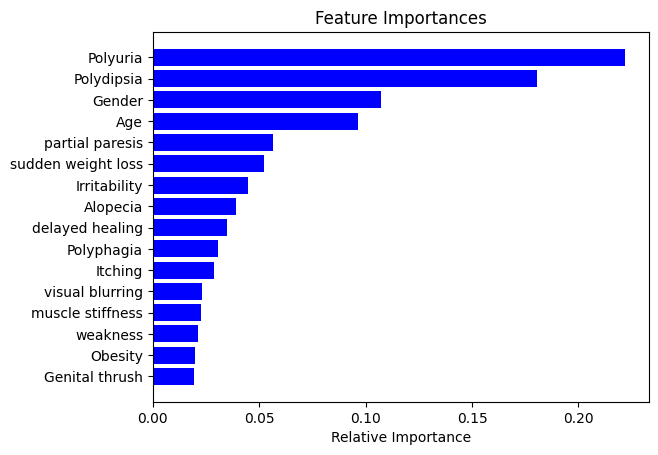

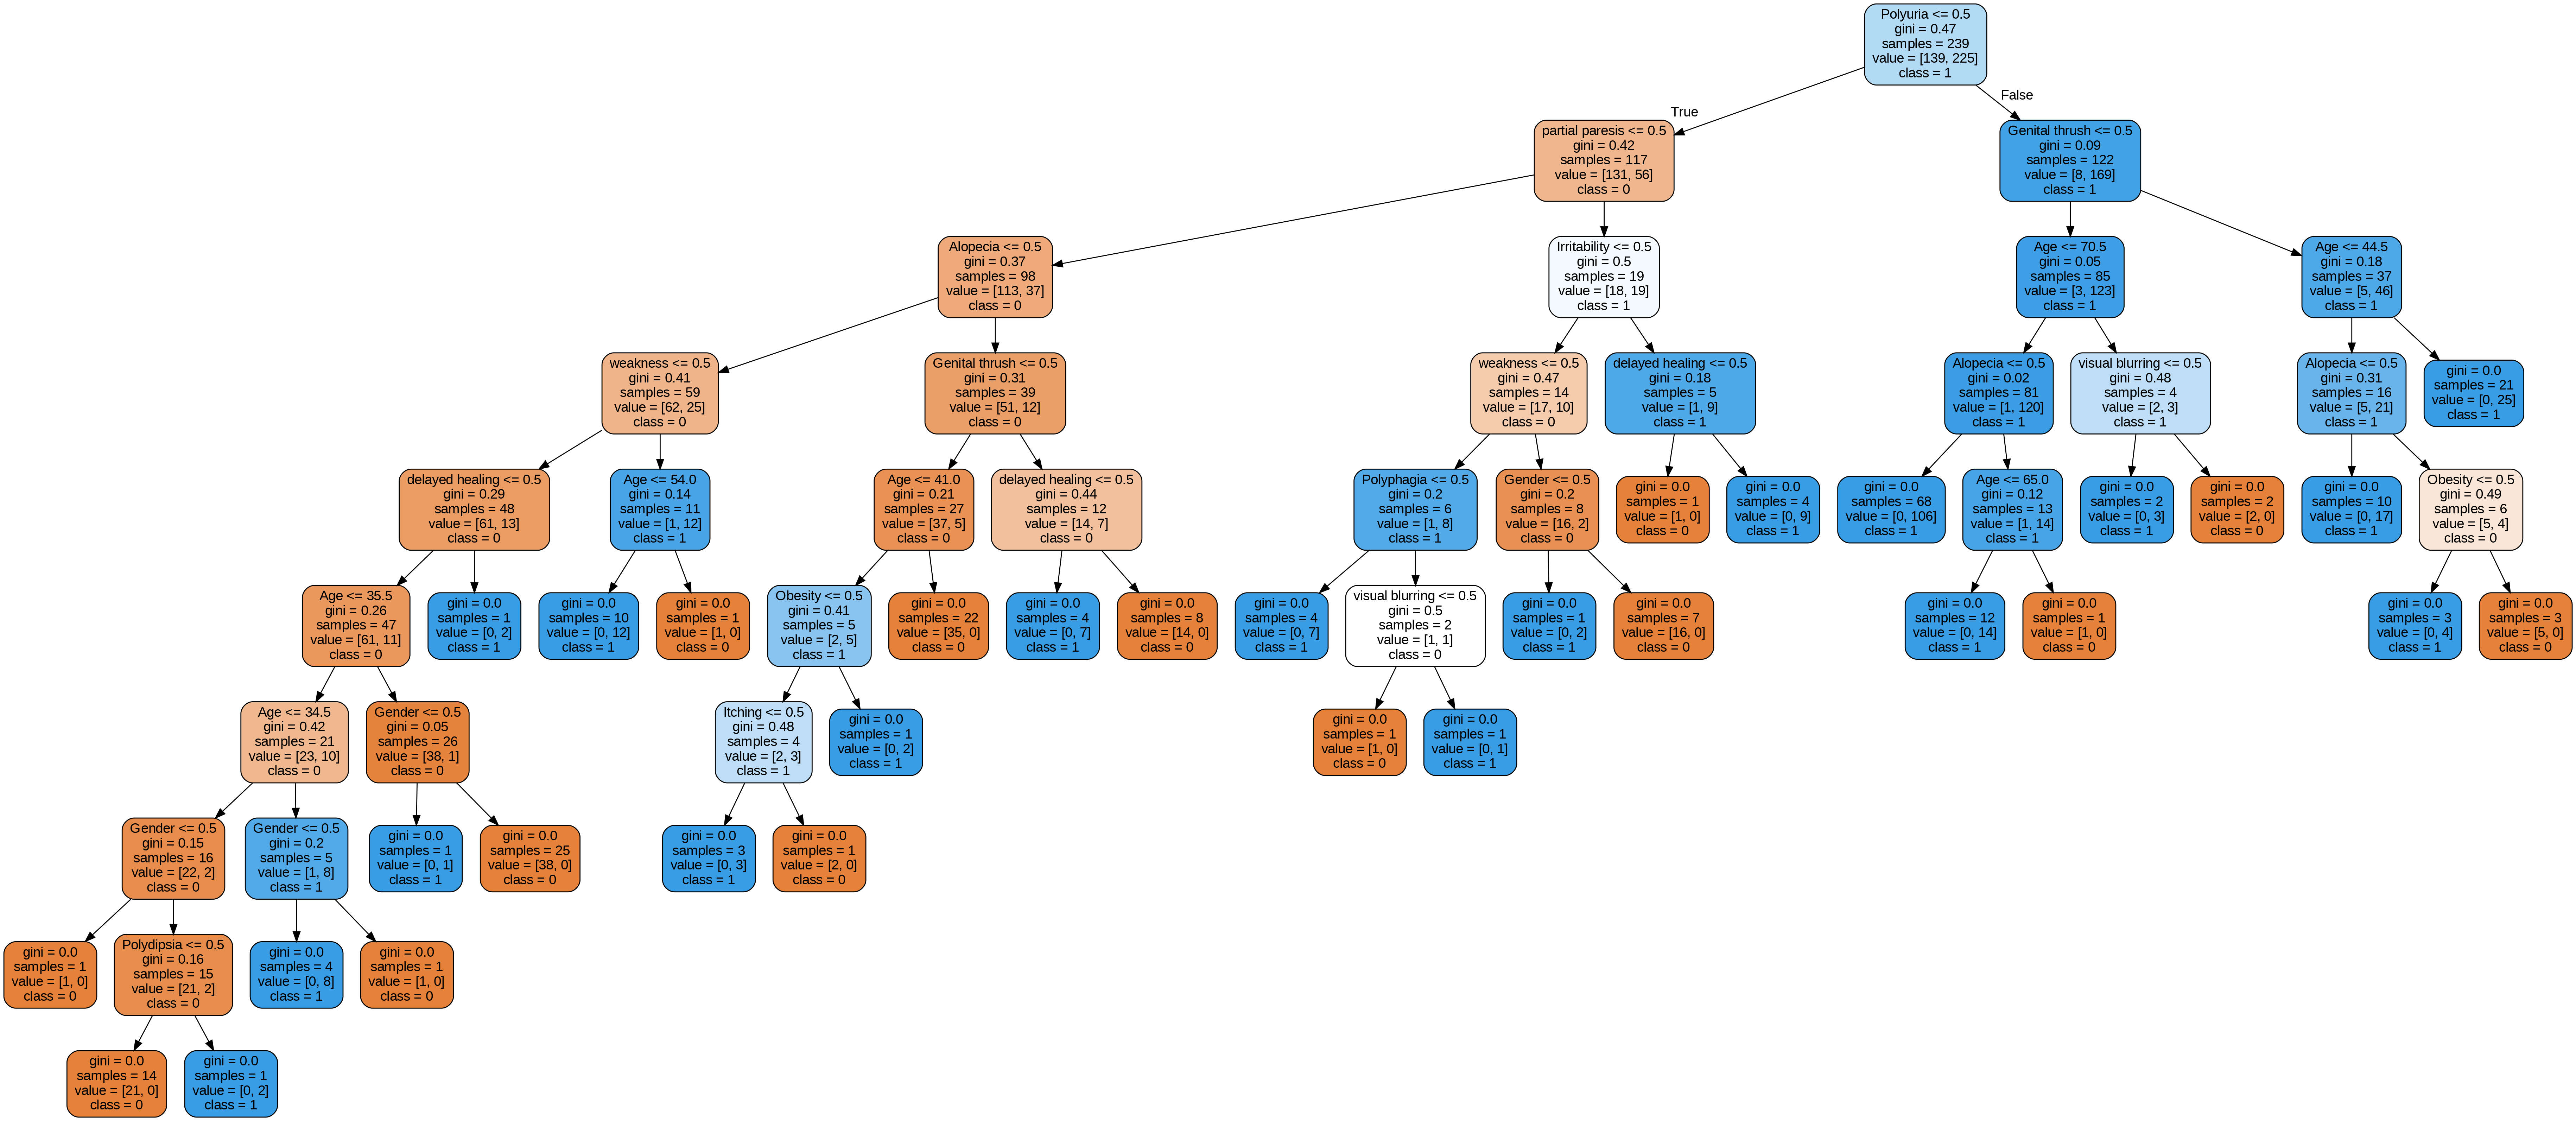

In [16]:
#Visualisasi
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()
estimator=rf.estimators_[5]
import os
from sklearn.tree import export_graphviz
export_graphviz(estimator,out_file='tree.dot',
 feature_names=features,
 class_names=featuresy2,
 rounded=True,proportion=False,
 precision=2,filled=True)
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=200'])
from IPython.display import Image
Image(filename='tree.png')


Insight : 

Polyuria memiliki pengaruh sangat besar dalam menentukan 
seseorang terdeteksi Diabetes Melitus dari pada variabel lainnya. Sedangkan variabel yang dianggap paling tidak mempengaruhi seseorang terdeteksi Diabetes Melitus adalah Polyphagia.